In [1]:
import pandas as pd
import numpy as np
import glob as glob


In [2]:
xls_data_path = '../abs-data/'
database_path = '../database/'

headers = pd.read_excel(xls_data_path + 'meta-data/headers.xlsx')

#%%
# Choose only the one which are marked with x in Selection-column

df_headers_chosen = headers.loc[headers['Selection'] == 'x']
selection_ = df_headers_chosen['Feature'].tolist()


In [3]:
selection_

['Consump1 Rate (kg/h)',
 'Consump2 Rate  (kg/h)',
 'Eng1 Tot1 Mass (kg)',
 'Eng1 Tot2 Mass (kg)',
 'Eng2 Tot1 Mass (kg)',
 'Eng2 Tot2 Mass (kg)',
 'Torque 1 (kNm)',
 'Speed 1 (rpm)',
 'Power1 (kW)',
 'SpeedlogSpeed (kn)',
 'Gps Speed (kn)',
 'Aux Power1 (kW)',
 'Latitude',
 'Longitude']

In [4]:
xlsfiles = glob.glob(xls_data_path + '*.xlsx')
print(xlsfiles)

['../abs-data/PemMinuteLogData_181210_181222_Chiba Balboa.xlsx', '../abs-data/PemMinuteLogData_190126_190201_Balboa Rizhao.xlsx', '../abs-data/PemMinuteLogData_181111_181122_Balboa Nagoya.xlsx', '../abs-data/PemMinuteLogData_181222_181226_Chiba Balboa.xlsx', '../abs-data/PemMinuteLogData_181023-181111_Balboa Nagoya.xlsx', '../abs-data/PemMinuteLogData_190201_190207_Balboa Rizhao.xlsx', '../abs-data/PemMinuteLogData_181202_181209_Chiba Balboa.xlsx']


In [34]:
df = pd.DataFrame()
all_data = pd.DataFrame()

all_data['voyage'] = 0

for i in range(len(xlsfiles)):
    df2 = pd.DataFrame()
    print('Processing: ',str(xlsfiles[i]))
    
    df = pd.read_excel(xlsfiles[i], index_col=0)
    
    
    df.index = pd.to_datetime(df.index)
    
    for header_ in selection_:
        if header_ in list(df):
            df2[header_] = df[header_]
            if 'Nagoya' in xlsfiles[i]:
                df2['voyage'] = 'Balboa Nagoya'
            if 'Chiba' in xlsfiles[i]:
                df2['voyage'] = 'Chiba Balboa'
            if 'Rizhao' in xlsfiles[i]:
                df2['voyage'] = 'Balboa Rizhao'
    
    
    all_data = all_data.append(df2,sort=True)
    all_data = all_data.sort_index()
    


Processing:  ../abs-data/PemMinuteLogData_181210_181222_Chiba Balboa.xlsx
Processing:  ../abs-data/PemMinuteLogData_190126_190201_Balboa Rizhao.xlsx
Processing:  ../abs-data/PemMinuteLogData_181111_181122_Balboa Nagoya.xlsx
Processing:  ../abs-data/PemMinuteLogData_181222_181226_Chiba Balboa.xlsx
Processing:  ../abs-data/PemMinuteLogData_181023-181111_Balboa Nagoya.xlsx
Processing:  ../abs-data/PemMinuteLogData_190201_190207_Balboa Rizhao.xlsx
Processing:  ../abs-data/PemMinuteLogData_181202_181209_Chiba Balboa.xlsx


In [35]:
#all_data.to_csv(database_path + 'merged_v3_selected.csv')
all_data.to_excel(database_path + 'merged_v3_datetime_selected.xlsx')
#all_data.to_hdf(database_path + 'merged_v3_selected.hd5','table',complevel=9,complib='blosc')


In [39]:
# After manually filtering out some faulty data in Excel, reload the database and save it again.

df = pd.read_excel('../database/merged_v3_datetime_selected.xlsx',index_col=0)

df = df.dropna()
df.index = pd.to_datetime(df.index)

df.to_hdf(database_path + 'merged_v3_datetime_selected.hd5','table',complevel=9,complib='blosc')
df.to_csv(database_path + 'merged_v3_datetime_selected.csv')



In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


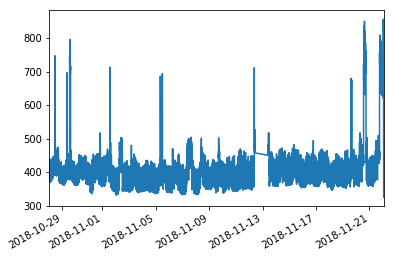

In [57]:
df['Aux Power1 (kW)']['2018-10-28':'2018-11-25'].plot()

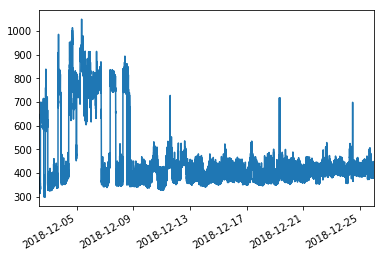

In [64]:
df['Aux Power1 (kW)']['2018-11-25':'2018-12-25'].plot()

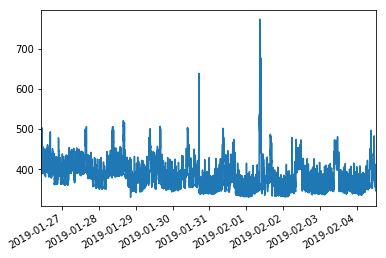

In [68]:
df['Aux Power1 (kW)']['2019-01-01':'2019-02-04'].plot()

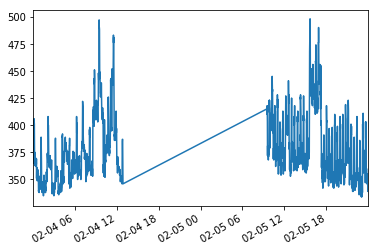

In [78]:
df['Aux Power1 (kW)']['2019-02-04':'2019-02-05'].dropna().plot()

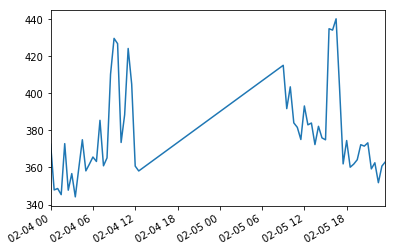

In [77]:
df['Aux Power1 (kW)']['2019-02-04':'2019-02-05'].resample('30min').mean().dropna().plot()

In [80]:
df['Aux Power1 (kW)']['2019-02-04':'2019-02-05'].resample('60min').mean()

2019-02-04 00:00:00    360.183333
2019-02-04 01:00:00    346.983333
2019-02-04 02:00:00    360.266667
2019-02-04 03:00:00    350.400000
2019-02-04 04:00:00    367.300000
2019-02-04 05:00:00    359.950000
2019-02-04 06:00:00    364.400000
2019-02-04 07:00:00    373.116667
2019-02-04 08:00:00    387.650000
2019-02-04 09:00:00    428.083333
2019-02-04 10:00:00    380.883333
2019-02-04 11:00:00    414.466667
2019-02-04 12:00:00    359.566038
2019-02-04 13:00:00           NaN
2019-02-04 14:00:00           NaN
2019-02-04 15:00:00           NaN
2019-02-04 16:00:00           NaN
2019-02-04 17:00:00           NaN
2019-02-04 18:00:00           NaN
2019-02-04 19:00:00           NaN
2019-02-04 20:00:00           NaN
2019-02-04 21:00:00           NaN
2019-02-04 22:00:00           NaN
2019-02-04 23:00:00           NaN
2019-02-05 00:00:00           NaN
2019-02-05 01:00:00           NaN
2019-02-05 02:00:00           NaN
2019-02-05 03:00:00           NaN
2019-02-05 04:00:00           NaN
2019-02-05 05: